$$\xi_{as}(t_d) = \frac{128 L^{2} n_{as} \xi_{1} \xi_{2} \xi_{3} \log{\left(2 \right)}^{\frac{3}{2}} \int\limits_{-\infty}^{\infty} f^2(t'-t_d) \left|{\kappa_{A} \kappa_{Q} \int\limits_{- t_{0}}^{\infty} H{\left(t' - \theta \right)} e^{- \frac{t'+\theta}{T_{2}}} f^2(\theta)\, d\theta}\right|^{2}\, dt'}{3 \pi^{\frac{7}{2}} c^{2} \epsilon_{0}^{2} n_{1} n_{2} n_{3} \tau^{3} w_{0}^{4}}$$

$$f(t)=e^{- \frac{2\log{\left(2 \right)}t^{2}}{\tau^{2}}}$$

$$\kappa_A = \frac{N \left(\frac{\partial\alpha}{\partial{q}}\right)_0 \omega_{as}}{2 c \epsilon_{0} n_{as}}$$

$$\kappa_Q = - \frac{\left(\frac{\partial\alpha}{\partial{q}}\right)_0}{2 \Omega_{R} m}$$

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

In [106]:
L = 10e-6
wl1,wl2,wl3 = 1000e-9,1100e-9,800e-9
nas,n1,n2,n3 = 1.5,1.5,1.5,1.5
xi1,xi2,xi3 = 1e-9,1e-9,1e-9
c = 3e8
eps0 = 8.5e-12
tau = 100e-15
w0 = 1e-6
om1,om2,om3 = 2*np.pi*c/wl1,2*np.pi*c/wl2,2*np.pi*c/wl3
omR = om1-om2
omas = om1-om2+om3
N = 1e30
m = 1e-24
pol_ten = (1e-23/N)**0.5
kappaA = N*pol_ten*omas/2/c/eps0/nas
kappaQ = -pol_ten/2/omR/m

def f(t):
    return np.exp(-2*np.log(2)*t**2/tau**2)

In [108]:
Smax = 128*L**2*nas*xi1*xi2*xi3*np.log(2)**(3/2)*kappaA**2*kappaQ**2/3/np.pi**(7/3)/c**2/eps0**2/n1/n2/n3/tau**3/w0**4
Smax

1.0820537560165011e+39

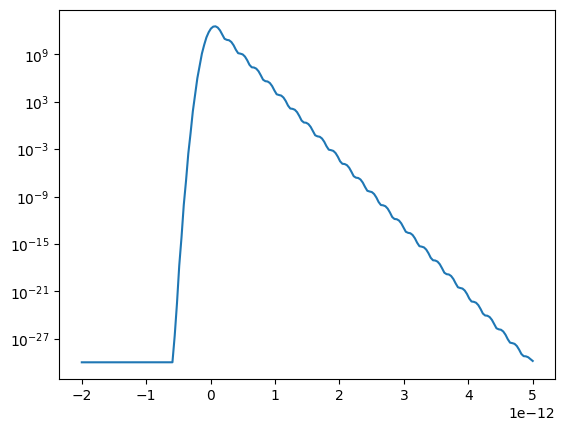

In [132]:
T2=100e-15
td_Arr = np.linspace(-2e-12,5e-12,200)
res2 = np.array([])
for td in td_Arr:
    tp_Arr = np.linspace(td-10*tau,td+10*tau,200)
    dtp = tp_Arr[1]-tp_Arr[0]
    res = np.array([])
    for tp in tp_Arr:
        the = np.linspace(tp-200*tau,tp+200*tau,200)
        dthe = the[1]-the[0]
        val = f(tp-td)**2*np.sum(np.abs(np.heaviside(tp, the)*np.exp(-(tp+the)/T2)*f(the)**2)**2)*(dthe)
        res = np.append(res,val)
    res2 = np.append(res2, np.sum(res)*dtp)
plt.plot(td_Arr,Smax*res2+1e-30)
plt.yscale('log')